In [1]:
#Connie Nguyen, Lap Wu, Joshua Nezianya, Katherine Cheng
#CMSC 206
#Group Project

#IMDB-Movie-Data.csv - Download file, included in zip file or at link: https://www.kaggle.com/datasets/PromptCloudHQ/imdb-data

#Install necessary packages
import sys
!{sys.executable} -m pip install requests
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install wordcloud


#Run all cells

Top 20 Movies with highest rating


,Ratings
The Shawshank Redemption,8.7
दिलवाले दुल्हनिया ले जायेंगे,8.7
The Godfather,8.7
Cosas imposibles,8.7
きみの瞳が問いかけている,8.6
Schindler's List,8.6
The Godfather: Part II,8.6
Gabriel's Inferno: Part II,8.6
劇場版 ヴァイオレット・エヴァーガーデン,8.6
同級生,8.6


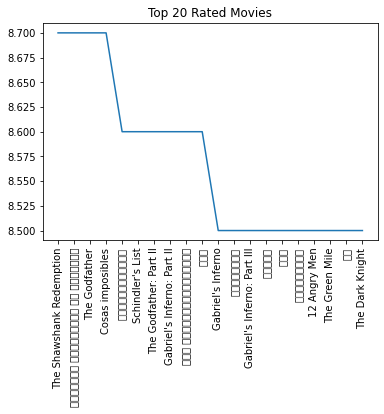

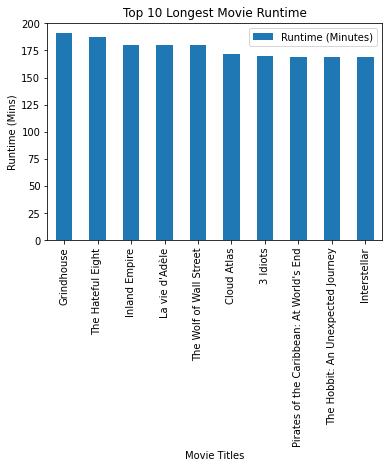

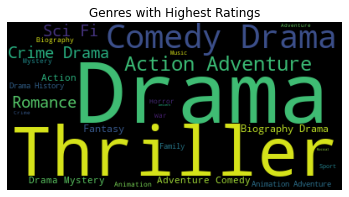

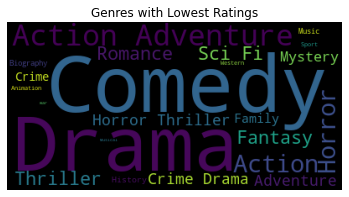

In [2]:
#Connie Nguyen
import requests
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import warnings
import json
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

#API call for moving ratings
api_key = "165a7b09fba87735cd54e2763dc6ae62"
api_version = 3
api_base_url = f"https://api.themoviedb.org/{api_version}"
endpoint_path = f"/movie/top_rated?"
endpoint = f"{api_base_url}{endpoint_path}api_key={api_key}&query=en-US"
r = requests.get(endpoint)



#Connie Nguyen - Gets the top 20 rated movies
if r.status_code in range(200,299):
  data = json.loads(r.text)
  results = data['results']
  i = 0
  movie_titles = []
  movie_ratings = []
  rating = dict()
  for result in results:
    i += 1
    _title = result['original_title']
    _rating = result['vote_average']
    movie_titles.append(_title)
    movie_ratings.append(_rating)
    if i >= 20:
      break
  rating['Ratings'] = movie_ratings
  print("Top 20 Movies with highest rating")
  ratings_df = pd.DataFrame(rating, movie_titles)
  display(ratings_df)
  plt.plot(movie_titles, movie_ratings)
  plt.title("Top 20 Rated Movies")
  plt.xticks(rotation = 90) #X values (Movie Names) not displaying properly due to language
  plt.show()



#Connie Nguyen-Gets the longest movie runtimes
fname = "IMDB-Movie-Data.csv"
while True:
  try:
    movies_df = pd.read_csv(fname)
    topRuntimeMovies_df = movies_df[['Runtime (Minutes)', 'Title']].sort_values(by = 'Runtime (Minutes)', ascending = False).head(10)
    #display(topRuntimeMovies_df)
    topRuntimeMovies_df.plot(kind='bar', x='Title', y='Runtime (Minutes)', title='Top 10 Longest Movie Runtime', xlabel = 'Movie Titles', ylabel = 'Runtime (Mins)')
    plt.show()



    #Connie Nguyen-Get genres with the highest ratings
    popularGenres_df = movies_df[['Genre', 'Rating']].sort_values(by = 'Rating', ascending = False).head(250)
    #display(popularGenres_df)
    genres_df = popularGenres_df['Genre'].values
    topGenres_string = ' '.join(genres_df)
    topGenres_string = re.sub('[,]',' ',topGenres_string)
    wordcloud = WordCloud().generate(topGenres_string)
    plt.title("Genres with Highest Ratings")
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


    #Connie Nguyen-Get genres with the lowest ratings
    lowestRating_df = movies_df[['Genre', 'Rating']].sort_values(by = 'Rating', ascending = False).tail(250)
    leastPopGenres_df = lowestRating_df['Genre'].values
    leastPopGenres_string = ' '.join(leastPopGenres_df)
    leastPopGenres_string = re.sub('[,]',' ',leastPopGenres_string)
    wordcloud = WordCloud().generate(leastPopGenres_string)
    plt.title("Genres with Lowest Ratings")
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    break
  except:
    print("File not found")
    fname = input("Please enter the location of the file named \'IMDB-Movie-Data.csv\': ")

The Shawshank Redemption
	 Genre ids:  [18, 80] . Genres: ['Drama', 'Crime']

Dilwale Dulhania Le Jayenge
	 Genre ids:  [35, 18, 10749] . Genres: ['Comedy', 'Drama', 'Romance']

The Godfather
	 Genre ids:  [18, 80] . Genres: ['Drama', 'Crime']

Impossible Things
	 Genre ids:  [10751, 18] . Genres: ['Family', 'Drama']

Your Eyes Tell
	 Genre ids:  [10749, 18] . Genres: ['Romance', 'Drama']

Schindler's List
	 Genre ids:  [18, 36, 10752] . Genres: ['Drama', 'History', 'War']

The Godfather: Part II
	 Genre ids:  [18, 80] . Genres: ['Drama', 'Crime']

Gabriel's Inferno: Part II
	 Genre ids:  [10749] . Genres: ['Romance']

Violet Evergarden: The Movie
	 Genre ids:  [16, 14, 10749, 18] . Genres: ['Animation', 'Fantasy', 'Romance', 'Drama']

Dou kyu sei – Classmates
	 Genre ids:  [10749, 16] . Genres: ['Romance', 'Animation']

Gabriel's Inferno
	 Genre ids:  [10749] . Genres: ['Romance']

Spirited Away
	 Genre ids:  [16, 10751, 14] . Genres: ['Animation', 'Family', 'Fantasy']

Gabriel's Infe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Common Genre of popular movies
                 Count
Genre                 
Action              65
Adventure           55
Crime               16
Mystery              9
Thriller            34
Romance             12
Drama               21
Science Fiction     28
Comedy              39
Family              22
Animation           27
Fantasy             38
Horror              16
Music                3
War                  0
Western              1
Documentary          0
History              0


<Figure size 432x288 with 0 Axes>

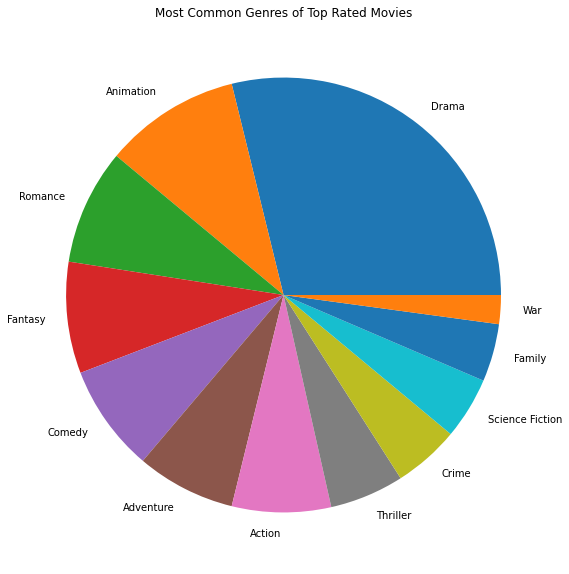

<Figure size 432x288 with 0 Axes>

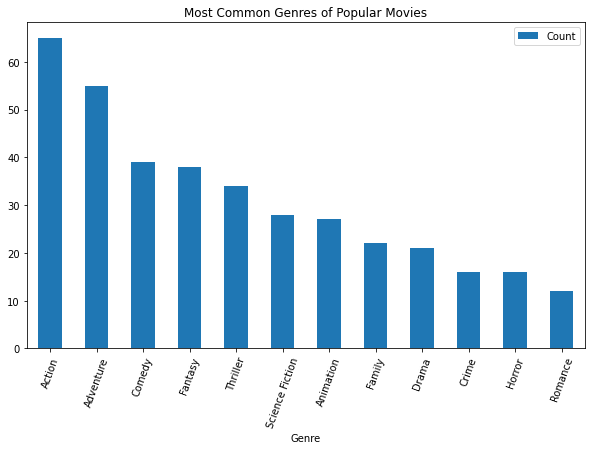

<Figure size 432x288 with 0 Axes>

In [3]:
#Lap Wu
#CMSC 206
#Group

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint


api_key = "f6401d58530db026444396255625bcac"
pp=pprint.PrettyPrinter()

api_version = 3
api_base_url = f"https://api.themoviedb.org/{api_version}"
endpoint_path = f"/movie/top_rated?"
endpoint = f"{api_base_url}{endpoint_path}api_key={api_key}"


#add movie to list
def addMovie():
  for result in results:
    movieList[result['title']]=[] #a list that contain genre info, 0=genre ids, 1 = genre name
    movieList[result['title']].append(result['genre_ids'])
    g=[]
    for n in movieList[result['title']][0]:
      index=0
      for a in genreKey['genres']:
        if n == a['id']:
          index= genreKey['genres'].index(a)
      g.append(genreKey['genres'][index]['name'])
      try:
        genreCount[genreKey['genres'][index]['name']]+=1
      except KeyError as e:
        genreCount[genreKey['genres'][index]['name']]=0
    movieList[result['title']].append(g) #add list of genre name
  
def printMovieList():
  for n in movieList.items():
    print(n[0])
    print('\t Genre ids: ',n[1][0],". Genres:",n[1][1])
    print()

#get genre key
genre=requests.get(f'https://api.themoviedb.org/3/genre/movie/list?api_key={api_key}&language=en-US')
genreKey=genre.json()
movieList={}
genreCount={} # count how many time each genre appears

#Top rated movie genres
#get pg 1-8 datas, 160 movies
for n in range(1,8):
  endpointpg=endpoint+f'&page={n}'
  data = requests.get(endpointpg).json()
  results = data['results']
  df=pd.DataFrame(data['results'])
  addMovie()

printMovieList()

ddf=pd.DataFrame({'Genre':genreCount.keys(),'Count':genreCount.values()}).set_index('Genre')
print('Common Genre of top rated movies')
print(ddf)
ddf=ddf.sort_values(by='Count',ascending=False,axis=0)
ddf['Count'].head(12).plot(kind='pie',title='Most Common Genres of Top Rated Movies',figsize=(12,10));
plt.axes().set_ylabel('')
plt.figure()


#most popular movie
endpoint_path = f"/movie/popular?"
endpoint = f"{api_base_url}{endpoint_path}api_key={api_key}"
movieList={}
genreCount={} # count how many time each genre appears
#get pg 1-8 datas, 160 movies
for n in range(1,8):
  endpointpg=endpoint+f'&page={n}'
  data = requests.get(endpointpg).json()
  results = data['results']
  df=pd.DataFrame(data['results'])
  addMovie()
# pp.pprint(data['results'])

ddf=pd.DataFrame({'Genre':genreCount.keys(),'Count':genreCount.values()}).set_index('Genre')
print('Common Genre of popular movies')
print(ddf)
ddf=ddf.sort_values(by='Count',ascending=False,axis=0)
ddf.head(12).plot.bar(rot=70,title='Most Common Genres of Popular Movies',figsize=(10,6));
plt.figure()

#printMovieList()

In [4]:
# Joshua Nezianya
# CSMC 206
# Group Project
# 05/04/20222

import json
from urllib import response
import requests as re
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


imdb_api_key ='/k_8uz05n2h/'
MOVIE_URL = 'https://imdb-api.com/en/API/SearchMovie'
BOX_OFFICE_END = 'https://imdb-api.com/en/API/BoxOfficeAllTime'
RATINGS_END = 'https://imdb-api.com/en/API/Ratings'
FULL_CAST_END = 'https://imdb-api.com/en/API/FullCast'
movie_ids = []
alltime_box_list = []
current_cast = []
# cast_dict = {}


all_rankings = []
all_titles = []
globe_gross = []
dom_gross = []
all_year = []

# Find a movie title 

def movie_title():
    # Selection list
    movie_matches = []
    # Get user's favorite movie
    movie_titl = str(input(' Please enter a movie title that you like. '))
    print(' You selected the title ', movie_titl)
    # Call API
    resp = re.get(MOVIE_URL + imdb_api_key + movie_titl).text
    response_data = json.loads(resp)
    results = response_data['results']
    for result in results:
        movie_matches.append(result)
        print('Movie ID: ', result['id'], result['title'], ' year: ', result['description'])
    exact_movie = str(input('Please enter the movie id for your selection. '))
    movie_ids.append(exact_movie)
    final_select = ''
    for movie in movie_matches:
        if movie['id'] == exact_movie:
            print(movie['title'])
            final_select = str(movie['title'])
            return final_select
        elif movie['id'] != exact_movie: 
            return
    return 

users_movie = movie_title()
# Movie Ratings 

def movie_ratings():
    reviews = []
    resp = re.get(RATINGS_END + imdb_api_key + movie_ids[0]).text
    response_data = json.loads(resp)
    reviews.append(response_data)
    pstore = pd.DataFrame(reviews, columns=['imDb', 'metacritic', 'theMovieDb', 'rottenTomatoes', 'filmAffinity'])
    print('These are the ratings for your movie ', '\n',pstore)
movie_ratings()



 Please enter a movie title that you like. Avengers
 You selected the title  Avengers
Movie ID:  tt0848228 The Avengers  year:  (2012)
Movie ID:  tt4154796 Avengers: Endgame  year:  (2019)
Movie ID:  tt4154756 Avengers: Infinity War  year:  (2018)
Movie ID:  tt2395427 Avengers: Age of Ultron  year:  (2015)
Movie ID:  tt0118661 The Avengers  year:  (1998)
Please enter the movie id for your selection. tt0118661
These are the ratings for your movie  
   imDb metacritic theMovieDb rottenTomatoes filmAffinity
0  3.8         12        4.4              5          3.0


In [5]:
def full_cast():
    resp = re.get(FULL_CAST_END + imdb_api_key + movie_ids[0]).text
    response_data = json.loads(resp)
    actors = response_data['actors']
    i = 0
    for actor in actors:
        current_cast.append(actor['name'])
        if i <= 7:
            i += 1
            print('Display 7 actors for ', 'Movie: ', users_movie, '\n', 'Actor Name: ',actor['name'])

full_cast()

Display 7 actors for  Movie:  None 
 Actor Name:  Ralph Fiennes
Display 7 actors for  Movie:  None 
 Actor Name:  Uma Thurman
Display 7 actors for  Movie:  None 
 Actor Name:  Sean Connery
Display 7 actors for  Movie:  None 
 Actor Name:  Patrick Macnee
Display 7 actors for  Movie:  None 
 Actor Name:  Jim Broadbent
Display 7 actors for  Movie:  None 
 Actor Name:  Fiona Shaw
Display 7 actors for  Movie:  None 
 Actor Name:  Eddie Izzard
Display 7 actors for  Movie:  None 
 Actor Name:  Eileen Atkins


In [6]:
def box_office():
    resp = re.get(BOX_OFFICE_END + imdb_api_key).text
    response_data = json.loads(resp)
    results = response_data['items']
    alltime_box_list.append(results)
    for result in results:
        all_rankings.append(result['rank'])
        all_titles.append(result['title'])
        globe_gross.append(result['worldwideLifetimeGross'])
        dom_gross.append(result['domesticLifetimeGross'])
        all_year.append(result['year'])
        if int(result['rank']) <= 10:
        # print(result)
            print(' Rank: ',result['rank'], '\n',
                ' Title: ', result['title'], '\n', 
                'Global Lifetime Gross:', 
                result['worldwideLifetimeGross'], '\n',
                'Domestic Lifetime Gross:',
                result['domesticLifetimeGross'], '\n',
                'Year:',
                result['year'])
box_office()

 Rank:  1 
  Title:  Avatar 
 Global Lifetime Gross: $2,847,379,794 
 Domestic Lifetime Gross: $760,507,625 
 Year: 2009
 Rank:  2 
  Title:  Avengers: Endgame 
 Global Lifetime Gross: $2,797,501,328 
 Domestic Lifetime Gross: $858,373,000 
 Year: 2019
 Rank:  3 
  Title:  Titanic 
 Global Lifetime Gross: $2,201,647,264 
 Domestic Lifetime Gross: $659,363,944 
 Year: 1997
 Rank:  4 
  Title:  Star Wars: Episode VII - The Force Awakens 
 Global Lifetime Gross: $2,069,521,700 
 Domestic Lifetime Gross: $936,662,225 
 Year: 2015
 Rank:  5 
  Title:  Avengers: Infinity War 
 Global Lifetime Gross: $2,048,359,754 
 Domestic Lifetime Gross: $678,815,482 
 Year: 2018
 Rank:  6 
  Title:  Spider-Man: No Way Home 
 Global Lifetime Gross: $1,892,583,292 
 Domestic Lifetime Gross: $804,583,292 
 Year: 2021
 Rank:  7 
  Title:  Jurassic World 
 Global Lifetime Gross: $1,671,537,444 
 Domestic Lifetime Gross: $653,406,625 
 Year: 2015
 Rank:  8 
  Title:  The Lion King 
 Global Lifetime Gross: $1,6

                                        Title DomesticGross      TotalGross
0                                      Avatar  $760,507,625  $2,847,379,794
1                           Avengers: Endgame  $858,373,000  $2,797,501,328
2                                     Titanic  $659,363,944  $2,201,647,264
3  Star Wars: Episode VII - The Force Awakens  $936,662,225  $2,069,521,700
4                      Avengers: Infinity War  $678,815,482  $2,048,359,754


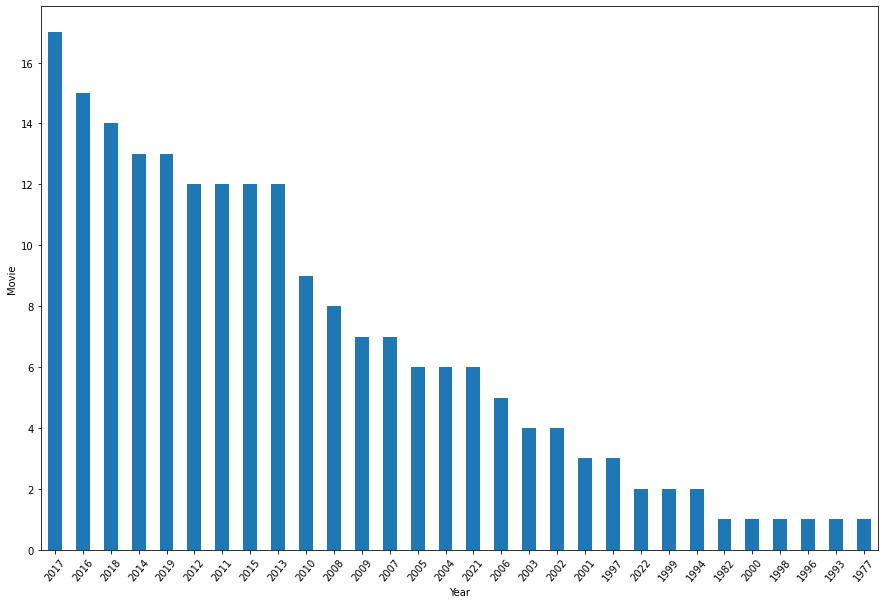

In [7]:
def my_graph():
    top_dict = {"Rank": all_rankings, "Title": all_titles, 
                "TotalGross": globe_gross, "DomesticGross": dom_gross, "Year": all_year}
    data_f = pd.DataFrame(top_dict)
    data_f.to_csv('totals.csv')

    gross_df = pd.read_csv('totals.csv')

    print(gross_df[["Title", "DomesticGross", "TotalGross"]].head())

    ranker = gross_df.groupby("Year")
    print(ranker)

    plt.figure(figsize=(15,10))
    ranker.size().sort_values(ascending=False).plot.bar()
    plt.xticks(rotation=50)
    plt.xlabel("Year")
    plt.ylabel("Movie")
    plt.show()

my_graph()

In [8]:
print(users_movie)
def movie_highest_grossing_check(my_movie):
    for gross in alltime_box_list:
        if my_movie is gross[0]['title']:
            print('Your movie is ranked: ', 
                  gross['rank'],
                  'Global Lifetime Gross: ', 
                  gross['worldwideLifetimeGross'],
                  'Domestic Lifetime Gross: ',
                  gross['domesticLifetimeGross']
                  )
            return gross['title']
        else: 
            print('Your movie is not one of the top 200 highest grossing films')
            return
    return

movie_highest_grossing_check(users_movie)

None
Your movie is not one of the top 200 highest grossing films


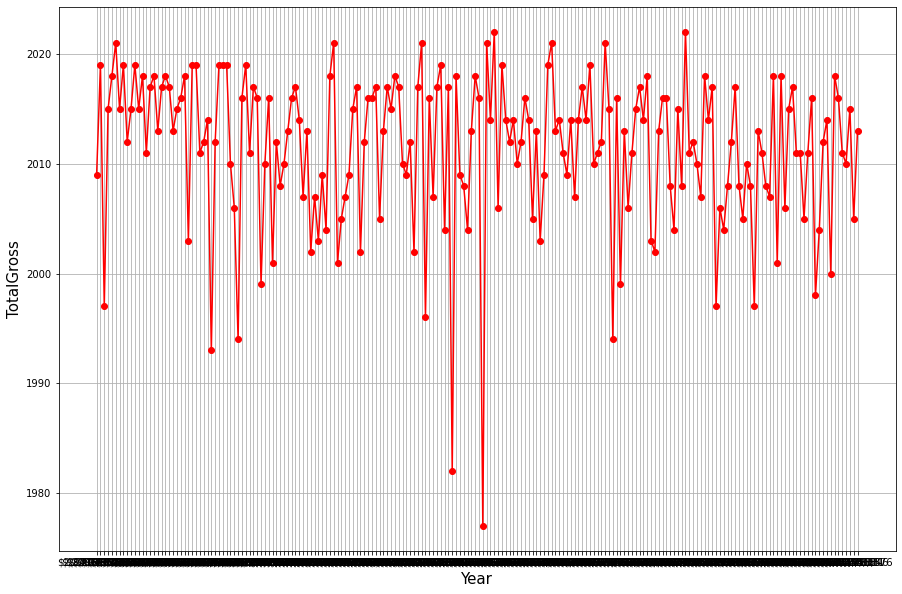

In [9]:
def my_graph_two():
    top_dict = {"Rank": all_rankings, "Title": all_titles, 
                "TotalGross": globe_gross, "DomesticGross": dom_gross, "Year": all_year}
    data_f = pd.DataFrame(top_dict)
    data_f.to_csv('totals.csv')

    gross_df = pd.read_csv('totals.csv')
    
    plt.figure(figsize=(15,10))
    plt.plot(gross_df['TotalGross'], gross_df['Year'], color='red', marker='o')
    plt.xlabel("Year",  fontsize=15)
    plt.ylabel("TotalGross", fontsize=15)
    plt.grid(True)
    plt.show()

my_graph_two()